In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib notebook

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Replicating AlexNet on the MNIST dataset

MNIST is a standard computer vision dataset for benchmarking models. It consists of a series of $28x28$ images of handwritten digits, pre-zero padded.

following https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5

In [5]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [16]:
mnist.data.shape

(70000, 784)

In [18]:
from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 58s 5us/step


In [19]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

<IPython.core.display.Javascript object>


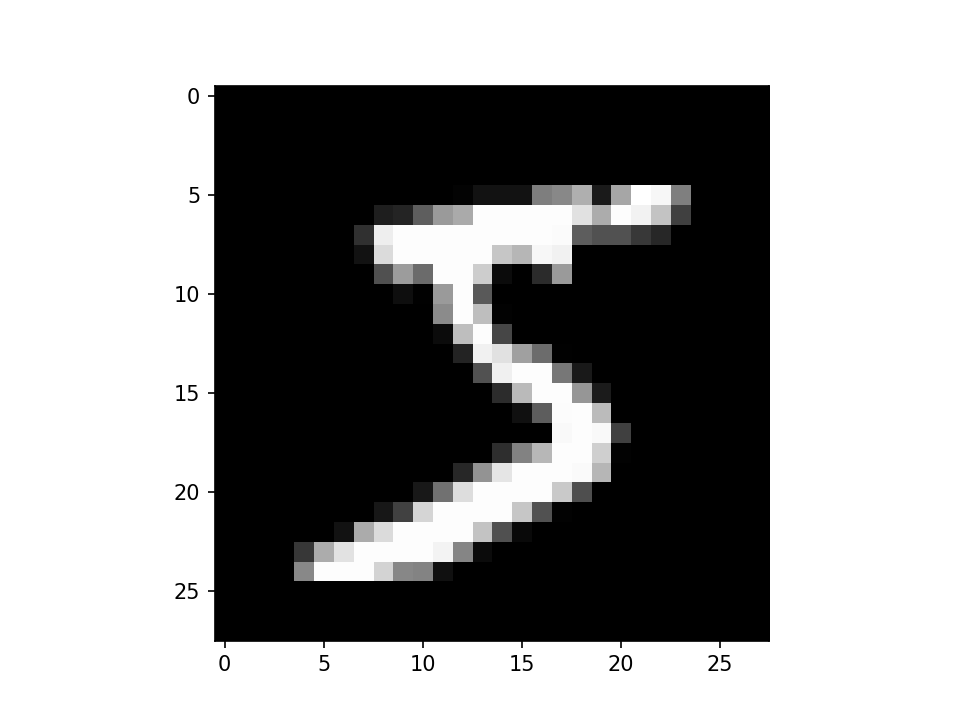

In [22]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(X_train[0], cmap="gray")

In [23]:
#check image shape
X_train[0].shape

(28, 28)

In [25]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

# x number of images, 28x28 pixels, 1 channel (grey)

In [26]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

# one hot, array[4] = 1 for 5th classification etc...

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

In [29]:
model = Sequential()

model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(10, activation="softmax")) #10 nodes because 10 possible outcomes

Instructions for updating:
Colocations handled automatically by placer.


In [31]:
#compile model
model.compile(optimizer="adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [33]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 265s 4ms/step - loss: 7.3225 - acc: 0.5455 - val_loss: 7.2168 - val_acc: 0.5521
Epoch 2/10
60000/60000 [==============================] - 265s 4ms/step - loss: 7.2796 - acc: 0.5482 - val_loss: 7.2033 - val_acc: 0.5530
Epoch 3/10
60000/60000 [==============================] - 273s 5ms/step - loss: 7.1458 - acc: 0.5566 - val_loss: 7.1944 - val_acc: 0.5535
Epoch 4/10
60000/60000 [==============================] - 279s 5ms/step - loss: 7.2570 - acc: 0.5497 - val_loss: 7.8473 - val_acc: 0.5130
Epoch 5/10
 7776/60000 [==>...........................] - ETA: 3:39 - loss: 7.5612 - acc: 0.5309

KeyboardInterrupt: 